<a href="https://colab.research.google.com/github/bigkorn55/ToolsAssign/blob/main/Classwork_1_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classwork 1**

Using dataset provide:

Perform

1. Stat feature selection

2. RFE

3. Permutation feature important

Comparison in model developing by using all features vs (1) vs (2) vs (3)

Please submit resolve in notebook with result variables:

o Number of features

o Selected features

o Feature Ranking

o Model result

# 1.Stat feature selection

                                        Feature_name  F-statistic  \
0                           Number of times pregnant    39.670227   
1  Plasma glucose concentration a 2 hours in an o...   213.161752   
2                   Diastolic blood pressure (mm Hg)     3.256950   
3                   Triceps skin fold thickness (mm)     4.304381   
4                     2-Hour serum insulin (mu U/ml)    13.281108   
5     Body mass index (weight in kg/(height in m)^2)    71.772072   
6                         Diabetes pedigree function    23.871300   
7                                        Age (years)    46.140611   

   Feature_Ranking  Select_Feature  
0                4            True  
1                1            True  
2                8           False  
3                7           False  
4                6           False  
5                2            True  
6                5           False  
7                3            True  


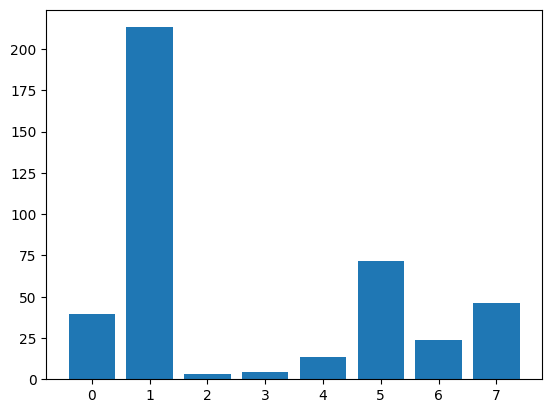

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

df = pd.read_excel('/content/pima-indians-diabetes.xlsx')

# ให้แน่ใจว่า 'Class_variable' มีอยู่ใน DataFrame
target_column = 'Class variable (0 or 1)'
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in DataFrame.")

# เลือก features จาก DataFrame
X = df.drop(target_column, axis=1)
y = df[target_column]

# เลือก feature ด้วย SelectKBest
feature_selection = SelectKBest(score_func=f_classif, k=4)
X_selected = feature_selection.fit_transform(X, y)

# Create DataFrame for Summary with actual column names
df_results = pd.DataFrame({
    "Feature_name": X.columns,
    "F-statistic": feature_selection.scores_})
df_results["Feature_Ranking"] = df_results["F-statistic"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= X_selected.shape[1]
print(df_results)

# Plot the feature importance
pyplot.bar([x for x in range(len(feature_selection.scores_))], feature_selection.scores_)
pyplot.show()


# 2.RFE

>2 0.674 (0.049)
>3 0.678 (0.062)
>4 0.694 (0.056)
>5 0.701 (0.053)
>6 0.700 (0.056)
>7 0.691 (0.054)
>8 0.694 (0.054)


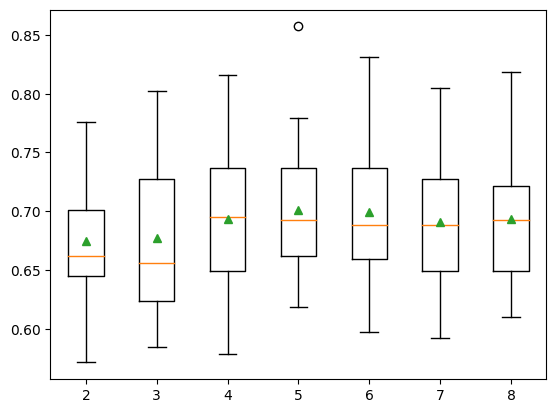

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# โหลดข้อมูล
df = pd.read_excel('/content/pima-indians-diabetes.xlsx')

# แยกตัวแปรต้น (features) และตัวแปรตาม (target)
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

# สร้างโมเดลที่ใช้ RFE
def get_models():
    models = dict()
    for i in range(2, len(X.columns) + 1):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# ประเมินโมเดล
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# พล็อตผลลัพธ์
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


Number of features = 5

In [ ]:
# เลือกจำนวนคุณสมบัติที่ต้องการ
selected_num_features = 5

# ดำเนินการตามตัวอย่างโค้ด
models = get_models()
selected_features = []

for name, model in models.items():
    # ทำ RFE
    rfe = model.named_steps['s']
    rfe.fit(X, y)

    # เลือกคุณสมบัติตามจำนวนที่ต้องการ
    selected_features.append(X.columns[rfe.support_].tolist())

# เลือกคุณสมบัติจากรอบที่มีค่า accuracy ที่สูงที่สุด
selected_features_for_top_accuracy = selected_features[np.argmax(np.mean(model_results, axis=1))]

# แสดงคุณสมบัติที่ถูกเลือก
print("Selected features based on the highest accuracy:")
print(selected_features_for_top_accuracy[:selected_num_features])


Selected features based on the highest accuracy:
['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function']


Selected features
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function

In [ ]:
# หาค่า accuracy ที่สูงที่สุด
index_of_top_accuracy = np.argmax(np.mean(model_results, axis=1))

# แสดง Feature Ranking ของคุณสมบัติที่ถูกเลือกจาก RFE
print("Feature Ranking based on the highest accuracy:")
print(feature_ranking[index_of_top_accuracy])


Feature Ranking based on the highest accuracy:
[1 1 1 3 2 1 1 1]


In [ ]:
# แสดง Model Result ที่ได้จาก cross-validation
for i, (name, model) in enumerate(models.items()):
    print(f"{name}: Mean Accuracy = {np.mean(results[i]):.3f}, Standard Deviation = {np.std(results[i]):.3f}")


2: Mean Accuracy = 0.674, Standard Deviation = 0.049
3: Mean Accuracy = 0.678, Standard Deviation = 0.062
4: Mean Accuracy = 0.694, Standard Deviation = 0.056
5: Mean Accuracy = 0.701, Standard Deviation = 0.053
6: Mean Accuracy = 0.700, Standard Deviation = 0.056
7: Mean Accuracy = 0.691, Standard Deviation = 0.054
8: Mean Accuracy = 0.694, Standard Deviation = 0.054


# 3.Permutation feature important

                                        Feature_name     Score  \
0                           Number of times pregnant  0.054916   
1  Plasma glucose concentration a 2 hours in an o...  0.312548   
2                   Diastolic blood pressure (mm Hg)  0.100436   
3                   Triceps skin fold thickness (mm)  0.019463   
4                     2-Hour serum insulin (mu U/ml)  0.035163   
5     Body mass index (weight in kg/(height in m)^2)  0.232825   
6                         Diabetes pedigree function  0.127436   
7                                        Age (years)  0.117213   

   Feature_Ranking  Select_Feature  
0                6           False  
1                1            True  
2                5           False  
3                8           False  
4                7           False  
5                2            True  
6                3            True  
7                4            True  


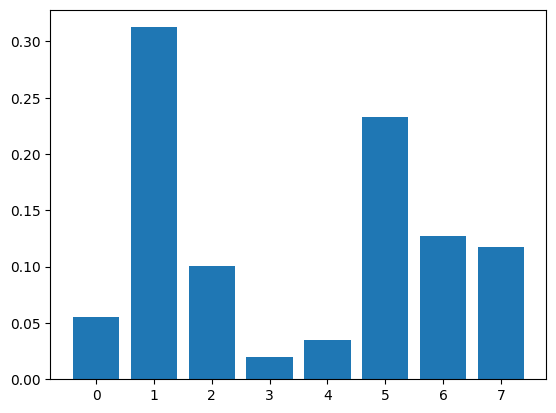

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

df = pd.read_excel('/content/pima-indians-diabetes.xlsx')

# แยกตัวแปรต้น (features) และตัวแปรตาม (target)
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

# สร้างโมเดล DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)

# ดึงค่าความสำคัญของ feature
feature_importance = model.feature_importances_

# สร้าง DataFrame สำหรับ Summary
df_results = pd.DataFrame({
    "Feature_name": X.columns,
    "Score": feature_importance})
df_results["Feature_Ranking"] = df_results["Score"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= 4
print(df_results)

# พล็อตกราฟ
pyplot.bar([x for x in range(len(feature_importance))], feature_importance)
pyplot.show()
